## Camouflage Evaluation Scores

In [1]:
import numpy as np
from PIL import Image as Image
import cv2
import  matplotlib.pyplot as plt
from scores.perceptual_scores import compute_Srf, compute_Sb
from utils.trimap import erode_dilate_fg

In [2]:
out_dir = 'out_dir'
im_name = 'example/animal-2.jpg'
mask_name = 'example/animal-2.png'
im = np.asarray(Image.open(im_name))/255
mask = np.asarray(Image.open(mask_name))/255
trimap = erode_dilate_fg(mask) 

### Reconstruction Fidelity Score

Text(0.5, 1.0, 'reconstructed image')

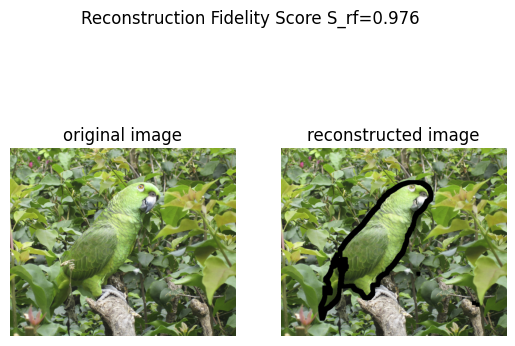

In [3]:
Srf = compute_Srf(im,trimap,out_dir,'animal-2',w=7)

fig, axs = plt.subplots(1,2)
fig.suptitle(f"Reconstruction Fidelity Score S_rf={float(Srf):.3f}")
axs[0].imshow(im)
axs[0].axis('OFF')
axs[0].set_title('original image')

out=np.asarray(Image.open('out_dir/animal-2reconstructed.jpg'))/255
axs[1].imshow(out)
axs[1].axis('OFF')
axs[1].set_title('reconstructed image')

### Boundary Score

In [4]:
im_c_name = 'example/animal-2-c.png'
im_c_gt_name = 'example/animal-2-c-gt.png'

im_c = np.asarray(Image.open(im_c_name))/255
im_c_gt = np.asarray(Image.open(im_c_gt_name))/255

Text(0.5, 1.0, 'GT contours')

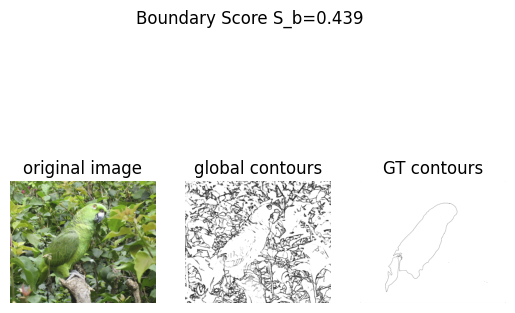

In [5]:
Sb=compute_Sb(im_c,im_c_gt,trimap)

fig, axs = plt.subplots(1,3)
fig.suptitle(f"Boundary Score S_b={float(Sb):.3f}")
axs[0].imshow(im)
axs[0].axis('OFF')
axs[0].set_title('original image')


axs[1].imshow(im_c,'gray')
axs[1].axis('OFF')
axs[1].set_title('global contours')

axs[2].imshow(im_c_gt,'gray')
axs[2].axis('OFF')
axs[2].set_title('GT contours')

### Combined Score

In [6]:
alpha = 0.35
S_alpha = (1-alpha)*Srf+alpha*Sb

print(S_alpha)

0.7878058119664253
